In [2]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 11.0 MB/s eta 0:00:00a 0:00:01


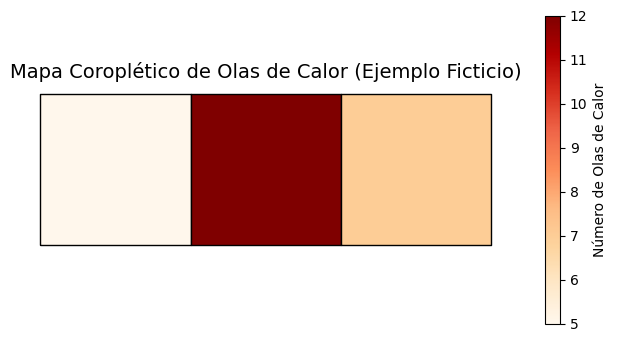

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# -------------------------------------------------------------
# 1. CREAR DATOS DE EJEMPLO (SIN SHAPEFILES REALES)
# -------------------------------------------------------------

# Definimos manualmente algunos polígonos ficticios
# que representarán 3 "comunas" rectangulares contiguas.
poly1 = Polygon([
    (0, 0),  (1, 0),  (1, 1),  (0, 1)
])
poly2 = Polygon([
    (1, 0),  (2, 0),  (2, 1),  (1, 1)
])
poly3 = Polygon([
    (2, 0),  (3, 0),  (3, 1),  (2, 1)
])

# Construimos un diccionario con:
#  - Nombre de comuna (ficticio)
#  - Geometría (el polígono)
#  - Número de olas de calor (random o inventado)
data = {
    'comuna': ['Comuna A', 'Comuna B', 'Comuna C'],
    'geometry': [poly1, poly2, poly3],
    'n_olas_calor': [5, 12, 7]
}

# Creamos el GeoDataFrame con un sistema de referencia
# geográfico cualquiera (EPSG:4326 como estándar)
gdf = gpd.GeoDataFrame(data, crs="EPSG:4326")

# -------------------------------------------------------------
# 2. GRAFICAR UN MAPA COROPLÉTICO
# -------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 4))

# El argumento "column" indica qué columna usaremos para asignar colores
# "cmap" define la paleta de colores (OrRd, Blues, Reds, etc.)
# legend=True dibuja la leyenda para la escala de colores.
gdf.plot(
    column='n_olas_calor',
    cmap='OrRd',
    legend=True,
    legend_kwds={'label': "Número de Olas de Calor"},
    edgecolor='black',
    ax=ax
)

# Opcional: títulos y ajustes de ejes
ax.set_title('Mapa Coroplético de Olas de Calor (Ejemplo Ficticio)', fontsize=14)
ax.set_axis_off()

plt.show()


Columnas disponibles: Index(['objectid', 'cod_region', 'region', 'cod_provincia', 'provincia',
       'cod_comuna', 'comuna', 'nombre', 'instrumento', 'administracion',
       'decreto_oficial', 'n_documento', 'tipo_documento', 'srid', 'geometry'],
      dtype='object')
   objectid cod_region                     region cod_provincia  provincia  \
0        62         13  Metropolitana de Santiago           131   Santiago   
1        63         13  Metropolitana de Santiago           136  Talagante   
2        64         13  Metropolitana de Santiago           136  Talagante   
3        65         13  Metropolitana de Santiago           136  Talagante   
4        66         13  Metropolitana de Santiago           131   Santiago   

  cod_comuna      comuna                          nombre  \
0      13132    Vitacura       Límite urbano de Vitacura   
1      13601   Talagante      Límite Urbano de Talagante   
2      13601   Talagante  Límite urbano de Oriente - Sur   
3      13601   Talag

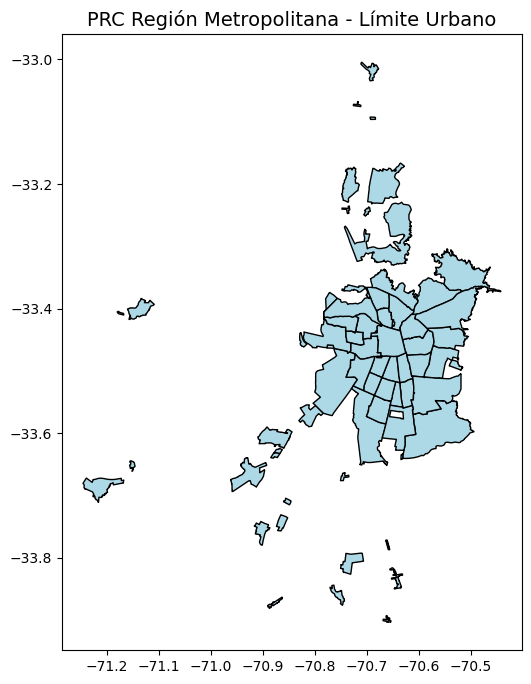

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Lee el archivo GeoJSON (asegúrate de poner la ruta correcta a tu archivo)
geojson_path = "PRC Región Metropolitana Límite Urbano.geojson"
gdf = gpd.read_file(geojson_path)

# 2. Revisa brevemente los datos cargados
print("Columnas disponibles:", gdf.columns)
print(gdf.head())

# 3. Visualiza el contenido geográfico
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='lightblue', edgecolor='black')
ax.set_title("PRC Región Metropolitana - Límite Urbano", fontsize=14)
plt.show()


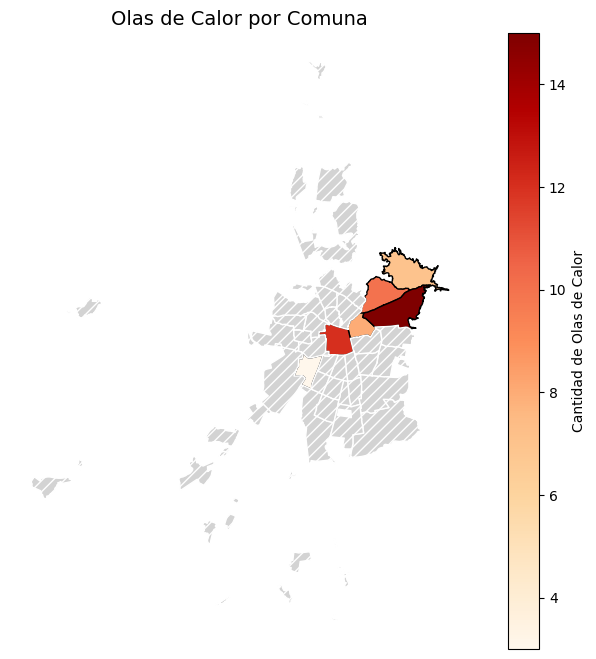

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carga el GeoJSON de límite urbano de la RM
#    (Asegúrate de actualizar la ruta a tu archivo)
geojson_path = "PRC Región Metropolitana Límite Urbano.geojson"
gdf_limite_urbano = gpd.read_file(geojson_path)

# 2. Simula un DataFrame con datos de "olas de calor" para varias comunas
#    Ten en cuenta que la columna 'comuna' en tu archivo GeoJSON se llama igual
#    (verifícalo con gdf_limite_urbano.columns)
df_olas_calor = pd.DataFrame({
    "comuna": ["Santiago", "Providencia", "Vitacura", "Las Condes", "Lo Barnechea", "Cerrillos"],
    "n_olas_calor": [12, 8, 10, 15, 7, 3]
})

# 3. Unimos (merge) el GeoDataFrame con el DataFrame de olas de calor
#    on='comuna' porque en 'properties' del GeoJSON se ve que existe la clave "comuna".
gdf_olas_calor = gdf_limite_urbano.merge(
    df_olas_calor,
    on="comuna",
    how="left"
)

# 4. Graficamos un mapa coroplético, usando la columna 'n_olas_calor'
#    Si alguna comuna no está en df_olas_calor quedará con NaN y se verá sin color
fig, ax = plt.subplots(figsize=(10, 8))
gdf_olas_calor.plot(
    column='n_olas_calor',
    cmap='OrRd',          # Paleta de colores (rojos)
    legend=True,
    edgecolor='black',
    missing_kwds={
        "color": "lightgray",
        "edgecolor": "white",
        "hatch": "///",
        "label": "Sin datos"
    },
    legend_kwds={
        "label": "Cantidad de Olas de Calor",
        "orientation": "vertical"
    },
    ax=ax
)

# 5. Ajustes finales del gráfico
ax.set_title("Olas de Calor por Comuna", fontsize=14)
ax.set_axis_off()
plt.show()
